<a href="https://colab.research.google.com/github/GarimaDewangan/Shala2020/blob/main/ML_asgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [1]:
from google.colab import files
uploaded = files.upload()

Saving attrition.csv to attrition.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [154]:
db = pd.read_csv('attrition.csv')

#Visualization

In [125]:
display(db)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0,1023
1024,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6,1024
1025,24,0,Travel_Rarely,1476,Sales,4,1,Medical,1,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3,1025
1026,32,0,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3,1026


In [126]:
db.shape

(1028, 34)

In [127]:
db.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [128]:
for i in db.columns:
  print(i, len(db[i].unique()), sum((db[i].isna())))

Age 43 0
Attrition 2 0
BusinessTravel 3 0
DailyRate 719 0
Department 3 0
DistanceFromHome 29 0
Education 5 0
EducationField 6 0
EmployeeCount 1 0
EmployeeNumber 1028 0
EnvironmentSatisfaction 4 0
Gender 2 0
HourlyRate 71 0
JobInvolvement 4 0
JobLevel 5 0
JobRole 9 0
JobSatisfaction 4 0
MaritalStatus 3 0
MonthlyIncome 966 0
MonthlyRate 1011 0
NumCompaniesWorked 10 0
OverTime 2 0
PercentSalaryHike 15 0
PerformanceRating 2 0
RelationshipSatisfaction 4 0
StockOptionLevel 4 0
TotalWorkingYears 40 0
TrainingTimesLastYear 7 0
WorkLifeBalance 4 0
YearsAtCompany 35 0
YearsInCurrentRole 19 0
YearsSinceLastPromotion 16 0
YearsWithCurrManager 18 0
ID 1028 0


In [129]:
for i in ['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime' ]:
  print(i, db[i].unique())

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
OverTime ['Yes' 'No']


In [155]:
y = db['Attrition']
x = db.drop(labels=['Attrition','ID','EmployeeNumber','EmployeeCount'],axis=1 )

In [145]:
display(x)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0
1024,47,Travel_Rarely,359,Research & Development,2,4,Medical,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6
1025,24,Travel_Rarely,1476,Sales,4,1,Medical,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3
1026,32,Travel_Rarely,601,Sales,7,5,Marketing,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3


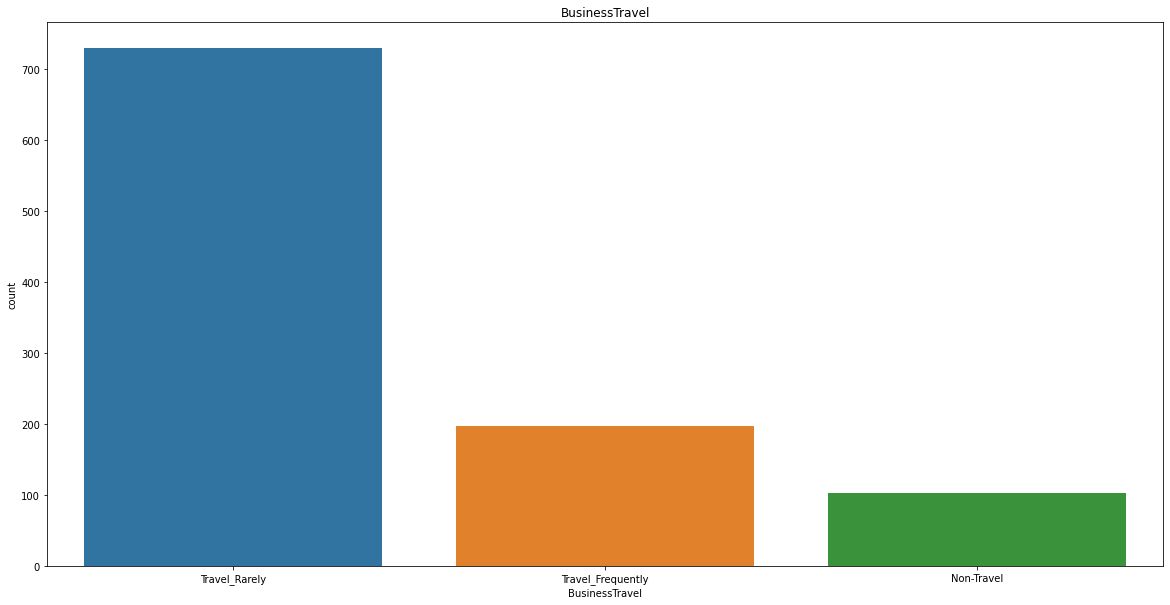

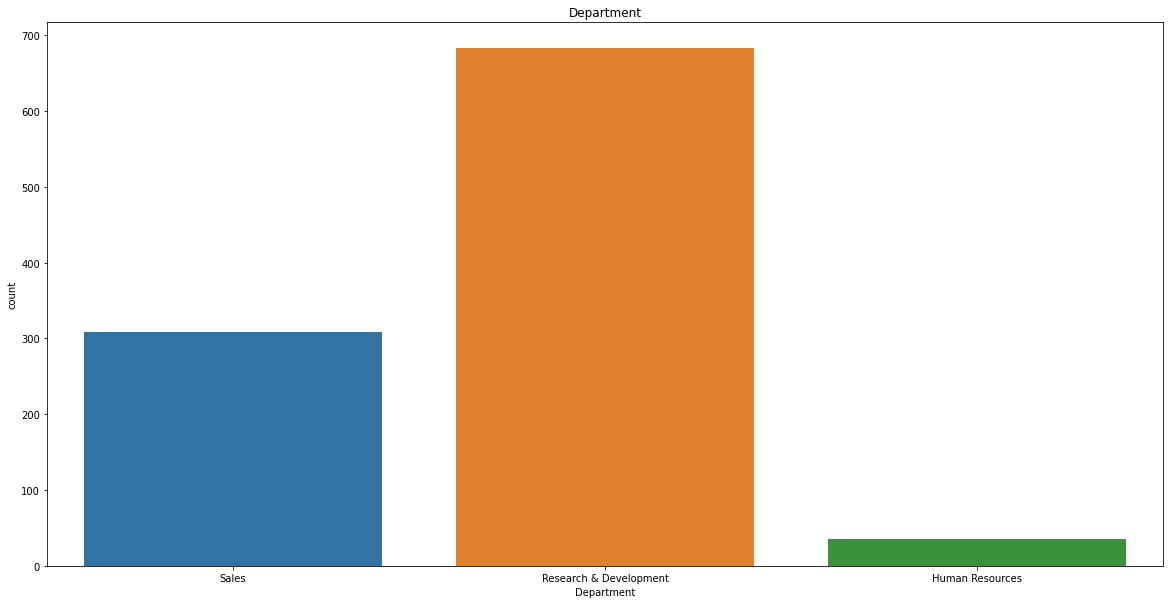

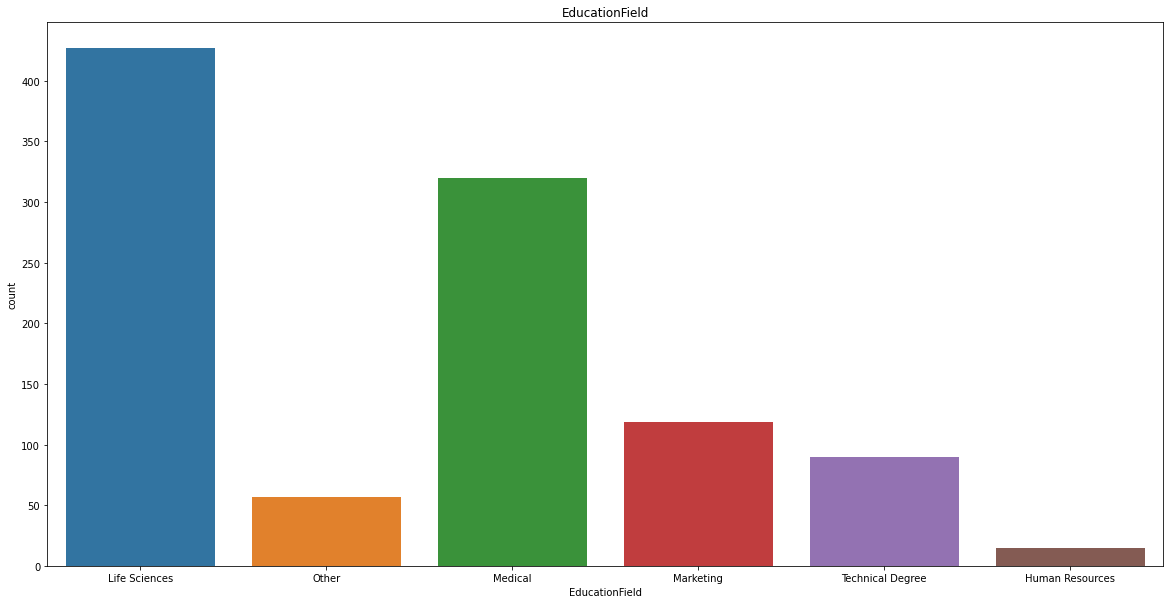

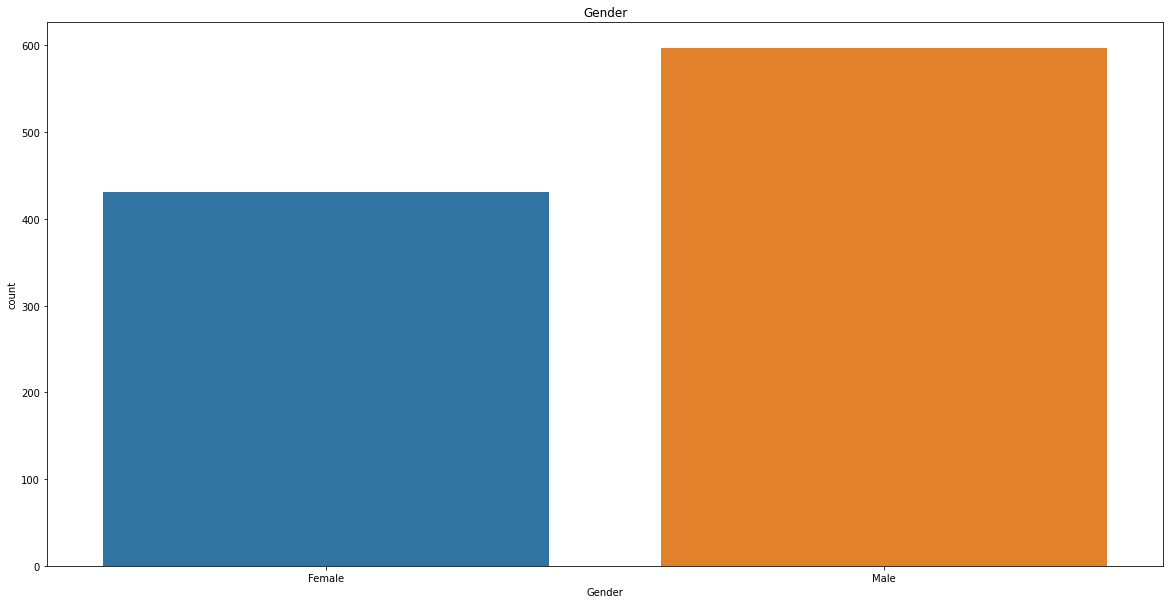

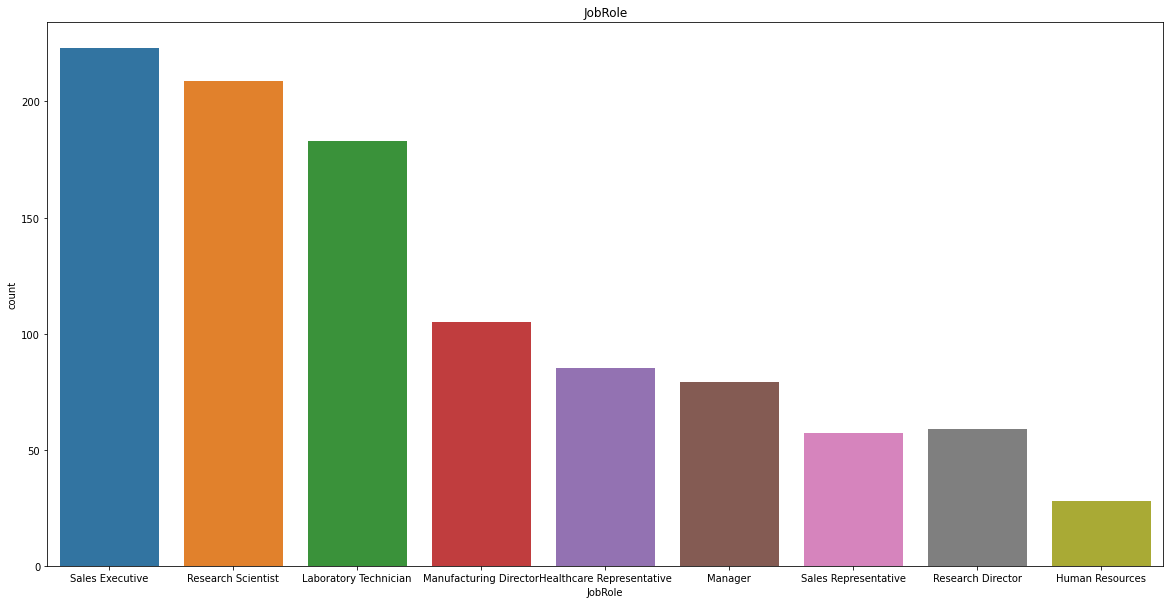

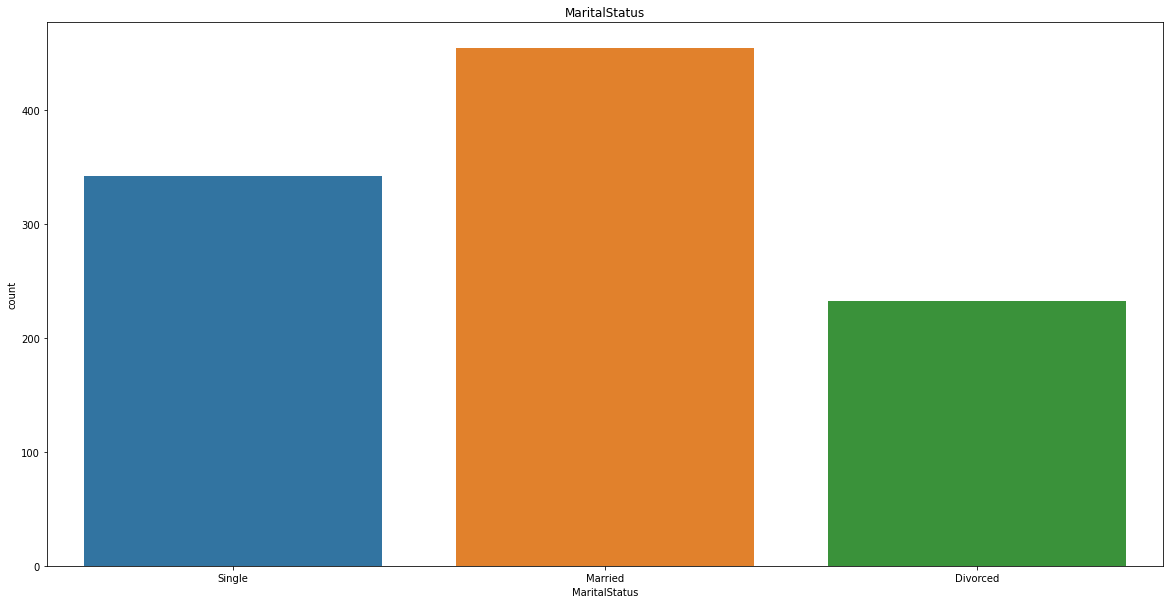

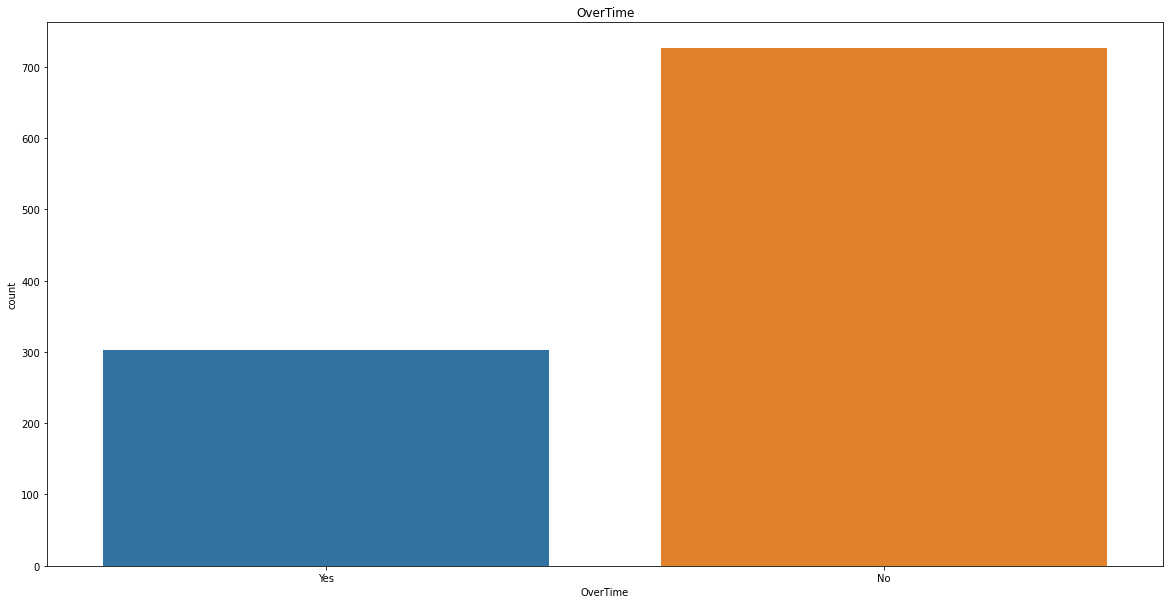

In [131]:
for i in ['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime' ]:
  plt.subplots(figsize=(20,10))
  sns.countplot(x = i, data = x)
  plt.title(i)
  plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74a35bf2d0>,
      dtype=object)

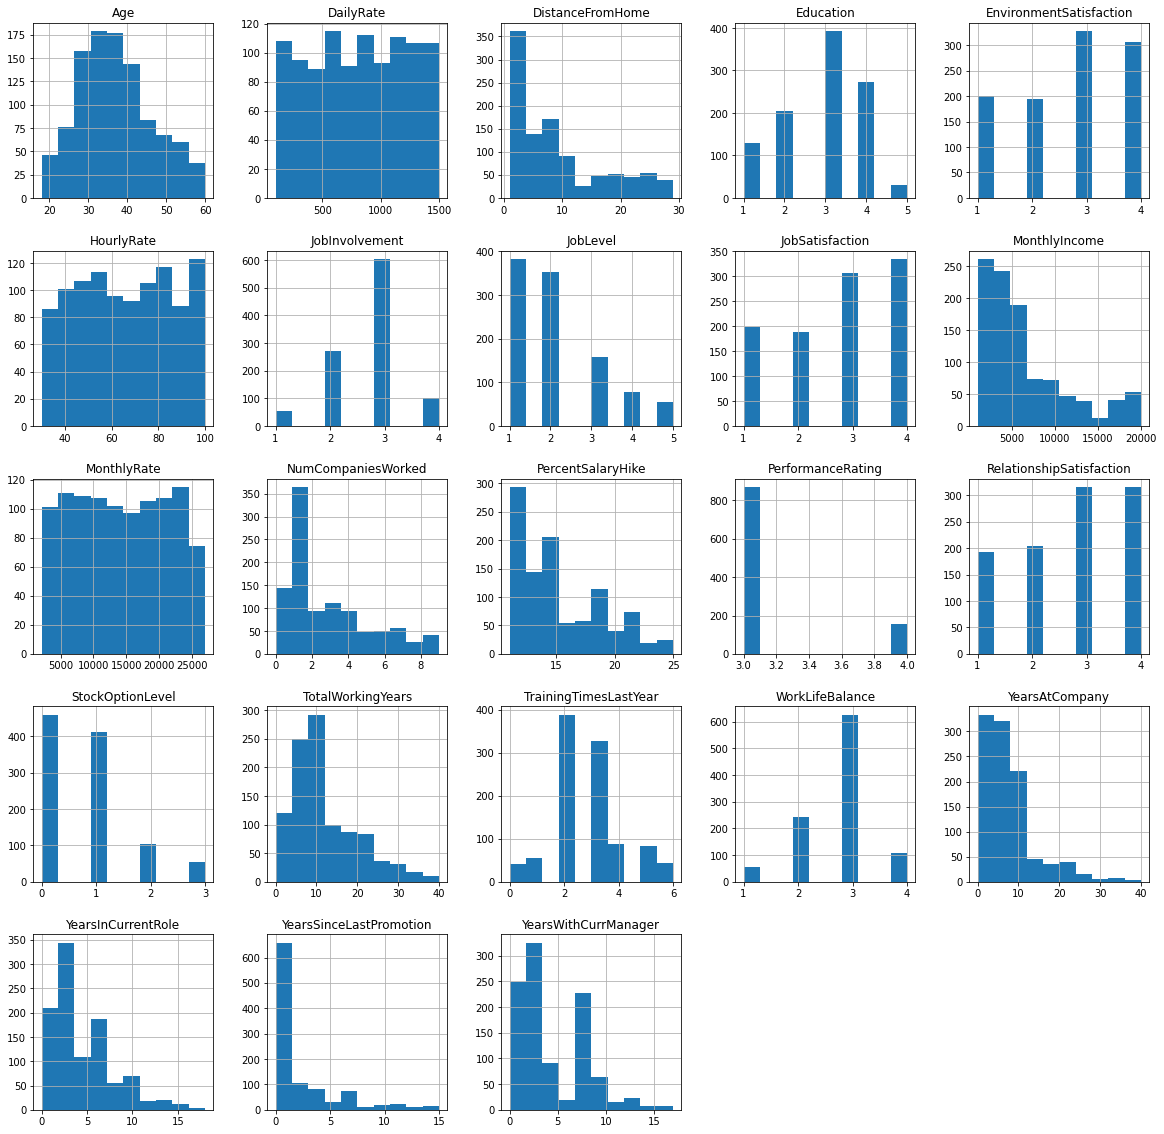

In [132]:
x.hist(figsize=(20,20))

In [156]:
x['Gender'] = x['Gender'].map({'Female': 1, 'Male' : 0})
x['Gender'] = x['Gender'].astype(int)

In [157]:
x['OverTime'] = x['OverTime'].map({'Yes':1, 'No':0})
x['OverTime'] = x['OverTime'].astype(int)

In [158]:
for i in ['BusinessTravel', 'Department', 'EducationField', 'JobRole','MaritalStatus']:
  dummy = pd.get_dummies(x[i])
  x = pd.concat([x,dummy],axis=1)

In [159]:
x = x.drop(labels=['BusinessTravel', 'Department', 'EducationField', 'JobRole','MaritalStatus'],axis=1 )

In [160]:
display(x)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,1102,1,2,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,1255,1,2,1,1,90,3,1,1,2066,10494,2,0,22,4,4,1,5,3,4,3,2,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1024,47,359,2,4,1,1,82,3,4,3,17169,26703,3,0,19,3,2,2,26,2,4,20,17,5,6,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1025,24,1476,4,1,4,1,42,3,2,3,4162,15211,1,1,12,3,3,2,5,3,3,5,4,0,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1026,32,601,7,5,4,0,97,3,2,4,9204,23343,4,0,12,3,3,1,7,3,2,4,3,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [161]:
x.dtypes

Age                          int64
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Non-Travel                   uint8
Travel_Frequently            uint8
Travel_Rarely                uint8
Human Resources     

In [162]:
x.shape

(1028, 49)

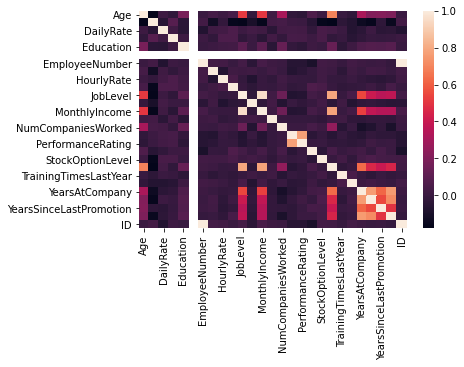

In [164]:
sns.heatmap(db.corr())

#Classification

##Split

In [165]:
x_t, x_test, y_t, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [166]:
x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size = 0.2, random_state=123)

In [167]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
440,34,988,23,3,2,1,43,3,3,1,9950,11533,9,1,15,3,3,3,11,2,3,3,2,0,2,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
325,31,798,7,2,3,1,48,2,3,3,8943,14034,1,0,24,4,1,1,10,2,3,10,9,8,9,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
435,33,1277,15,1,2,0,56,3,3,3,13610,24619,7,1,12,3,4,0,15,2,4,7,6,7,7,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
498,22,604,6,1,1,0,69,3,1,3,2773,12145,0,0,20,4,4,0,3,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
761,36,660,15,3,1,0,81,3,2,3,4834,7858,7,0,14,3,2,1,9,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,26,683,2,1,1,0,36,2,1,4,3904,4050,0,0,12,3,4,0,5,2,3,4,3,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
620,35,1343,27,1,3,1,53,2,1,1,2559,17852,1,0,11,3,4,0,6,3,2,6,5,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
551,39,141,3,3,3,1,44,4,2,2,6389,18767,9,0,15,3,3,1,12,3,1,8,3,3,6,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
302,28,1476,16,2,2,0,68,4,2,1,5661,4824,0,0,19,3,3,0,9,2,3,8,3,0,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


##Random Forest Classifier

In [168]:
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators' : [25, 30, 50, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)

In [169]:
CV_rfc.fit(x_t,y_t)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [170]:
CV_rfc.best_params_

{'max_features': 'sqrt', 'n_estimators': 25}

In [171]:
CV_rfc.best_score_

0.8552328159645232

In [172]:
rfc =  RandomForestClassifier(n_estimators = 25, max_features= 'sqrt')
rfc.fit(x_t, y_t)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
pred = rfc.predict(x_t)

In [176]:
accuracy = accuracy_score(y_t, pred)
print(accuracy)

1.0


In [177]:
pred = rfc.predict(x_test)

In [178]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.8446601941747572


In [179]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       172
           1       0.60      0.18      0.27        34

    accuracy                           0.84       206
   macro avg       0.73      0.58      0.59       206
weighted avg       0.81      0.84      0.81       206



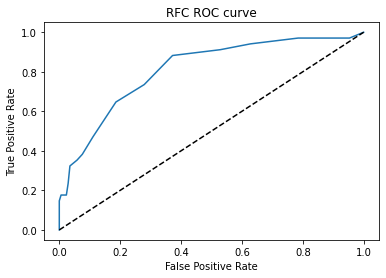

In [181]:
from sklearn.metrics import roc_curve  
probs = rfc.predict_proba(x_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
# show the plot
plt.show()

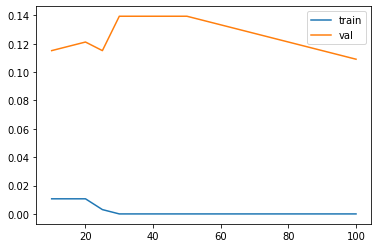

In [182]:
train = []
val = []
est = [10,20,25,30,50,100]
for i in est:
  rfc = RandomForestClassifier(n_estimators=i)
  rfc.fit(x_train,y_train)
  pred_train = rfc.predict(x_train)
  train.append(mean_squared_error(y_train, pred_train))
  pred_val = rfc.predict(x_val)
  val.append(mean_squared_error(y_val, pred_val))

plt.plot(est, train)
plt.plot(est,val)
plt.legend(['train','val'])
plt.show()


##XGBoost Classifier

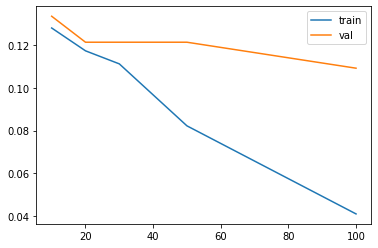

In [198]:
train = []
val = []
est = [10,20,25,30,50,100]
for i in est:
  xgb = XGBClassifier(n_estimators=i)
  xgb.fit(x_train,y_train)
  pred_train = xgb.predict(x_train)
  train.append(mean_squared_error(y_train, pred_train))
  pred_val = xgb.predict(x_val)
  val.append(mean_squared_error(y_val, pred_val))

plt.plot(est, train)
plt.plot(est,val)
plt.legend(['train','val'])
plt.show()

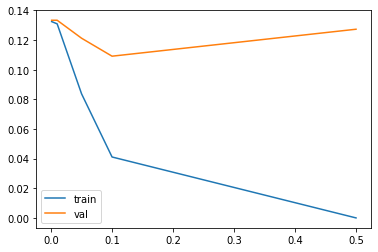

In [199]:
train = []
val = []
est = [0.001,0.01,0.05,0.1,0.5]
for i in est:
  rfc = XGBClassifier(learning_rate=i)
  rfc.fit(x_train,y_train)
  pred_train = rfc.predict(x_train)
  train.append(mean_squared_error(y_train, pred_train))
  pred_val = rfc.predict(x_val)
  val.append(mean_squared_error(y_val, pred_val))

plt.plot(est, train)
plt.plot(est,val)
plt.legend(['train','val'])
plt.show()

In [191]:
x_train = x_train.loc[:,~x_train.columns.duplicated()]

In [194]:
x_val = x_val.loc[:,~x_val.columns.duplicated()]

In [196]:
x_test = x_test.loc[:,~x_test.columns.duplicated()]

In [195]:
x_t = x_t.loc[:,~x_t.columns.duplicated()]

In [200]:
xgb = XGBClassifier(n_estimators = 20, learning_rate = 0.1)
xgb.fit(x_t, y_t)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [201]:
accuracy = accuracy_score(y_t, xgb.predict(x_t) )
print(accuracy)

0.8734793187347932


In [202]:
accuracy = accuracy_score(y_test, xgb.predict(x_test) )
print(accuracy)

0.8495145631067961


In [203]:
print(classification_report(y_test, xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       172
           1       0.64      0.21      0.31        34

    accuracy                           0.85       206
   macro avg       0.75      0.59      0.61       206
weighted avg       0.82      0.85      0.82       206



In [205]:
xgb = XGBClassifier()
param_grid = {
    'max_depth' : [3,5,7],
    'n_estimators' : [10,20,30,50,100],
    'learning-rate' : [0.001,0.005,0.01,0.05,0.1]
}
CV_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid)

In [210]:
CV_xgb.fit(x_t,y_t)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning-rate': [0.001, 0.005, 0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 20, 

In [211]:
CV_xgb.best_params_

{'learning-rate': 0.001, 'max_depth': 7, 'n_estimators': 30}

In [212]:
CV_xgb.best_score_

0.8503621581670362

In [214]:
xgb = XGBClassifier(learning_rate= 0.001, max_depth= 7, n_estimators= 30)

In [215]:
xgb.fit(x_t,y_t)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [218]:
accuracy = accuracy_score(y_t, xgb.predict(x_t))
print(accuracy)

0.902676399026764


In [219]:
accuracy = accuracy_score(y_test, xgb.predict(x_test))
print(accuracy)

0.8446601941747572


In [224]:
print(classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       172
           1       0.55      0.32      0.41        34

    accuracy                           0.84       206
   macro avg       0.71      0.64      0.66       206
weighted avg       0.82      0.84      0.83       206



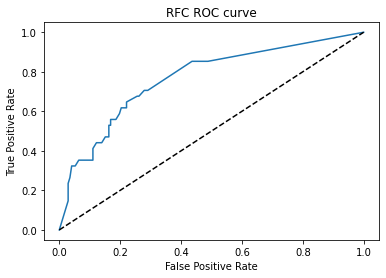

In [225]:
from sklearn.metrics import roc_curve  
probs = xgb.predict_proba(x_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
# show the plot
plt.show()

##Decision Tree Classifier


In [227]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [234]:
dt = DTC()
param_grid = {
    'max_features' : ['auto', 'sqrt', 'log2',None],
    'max_depth' : [3,5,10, None]
    }
CV_dt = GridSearchCV(estimator = dt, param_grid = param_grid)

In [235]:
CV_dt.fit(x_t,y_t)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, None],
                   

In [236]:
CV_dt.best_params_

{'max_depth': 3, 'max_features': 'sqrt'}

In [237]:
CV_dt.best_score_

0.8467257945306725

In [238]:
dt = DTC(max_depth = 3, max_features='sqrt')
dt.fit(x_t,y_t)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [239]:
accuracy = accuracy_score(y_t,dt.predict(x_t))
print(accuracy)

0.8406326034063261


In [240]:
accuracy = accuracy_score(y_test,dt.predict(x_test))
print(accuracy)

0.8446601941747572


In [241]:
print(classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       172
           1       0.67      0.12      0.20        34

    accuracy                           0.84       206
   macro avg       0.76      0.55      0.56       206
weighted avg       0.82      0.84      0.80       206



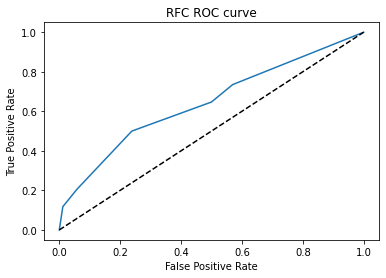

In [242]:
from sklearn.metrics import roc_curve  
probs = dt.predict_proba(x_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
# show the plot
plt.show()